In [ ]:
!pip install -Uq funasr modelscope torchaudio librosa soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.8/298.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.0/812.0 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 93.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.7/915.7 MB 1.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import numpy as np
from glob import glob
from funasr import AutoModel
from sklearn.metrics import classification_report

def evaluate_emotion2vec():
    label_map = {"01": "neutral", "03": "happy", "04": "sad", "05": "angry", 
                 "06": "fearful", "07": "disgusted", "08": "surprised"}
    
    # 1. Grab 100 valid files
    all_files = glob("/kaggle/input/datasets/uwrfkaggler/ravdess-emotional-speech-audio/*/*.wav")
    valid_files = [f for f in all_files if os.path.basename(f).split('-')[1] == '01' and os.path.basename(f).split('-')[2] in label_map]

    # 2. Run Inference
    model = AutoModel(model="iic/emotion2vec_plus_large", trust_remote_code=True, disable_update=True)
    results = model.generate(input=valid_files, extract_embedding=False, batch_size_s=60)

    # 3. Extract predictions and strip the Chinese characters
    y_true, y_pred = [], []
    for res in results:
        emotion_code = os.path.basename(res['key']).split('-')[2] 
        
        if emotion_code in label_map:
            y_true.append(label_map[emotion_code])
            # FIX: Split '开心/happy' by '/' and grab the last part ('happy')
            raw_label = res['labels'][np.argmax(res['scores'])]
            y_pred.append(raw_label.split('/')[-1])

    # 4. Generate Report
    print("\n" + "="*50 + "\n   FINAL EMOTION2VEC+ EVALUATION REPORT\n" + "="*50)
    print(classification_report(y_true, y_pred, labels=list(label_map.values()), zero_division=0))

evaluate_emotion2vec()

funasr version: 1.3.1.


Detect model requirements, begin to install it: /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/requirements.txt
install model requirements successfully
Loading remote code failed: model, No module named 'model'
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modali

rtf_avg: 0.048: 100%|██████████| 1248/1248 [03:40<00:00,  5.65it/s]                                                                                      


   FINAL EMOTION2VEC+ EVALUATION REPORT
              precision    recall  f1-score   support

     neutral       0.80      0.95      0.87        96
       happy       0.92      0.95      0.94       192
         sad       0.90      0.86      0.88       192
       angry       0.98      0.96      0.97       192
     fearful       0.99      0.88      0.93       192
   disgusted       0.90      0.97      0.94       192
   surprised       0.96      0.91      0.93       192

   micro avg       0.93      0.93      0.93      1248
   macro avg       0.92      0.93      0.92      1248
weighted avg       0.93      0.93      0.93      1248



In [ ]:
import os
import numpy as np
from glob import glob
from funasr import AutoModel
from sklearn.metrics import classification_report

def evaluate_emotion2vec():
    label_map = {"01": "neutral", "03": "happy", "04": "sad", "05": "angry", 
                 "06": "fearful", "07": "disgusted", "08": "surprised"}
    
    # 1. Grab 100 valid files
    all_files = glob("/kaggle/input/datasets/uwrfkaggler/ravdess-emotional-speech-audio/*/*.wav")
    valid_files = [f for f in all_files if os.path.basename(f).split('-')[1] == '01' and os.path.basename(f).split('-')[2] in label_map]

    # 2. Run Inference
    model = AutoModel(model="iic/emotion2vec_plus_base", trust_remote_code=True, disable_update=True)
    results = model.generate(input=valid_files, extract_embedding=False, batch_size_s=60)

    # 3. Extract predictions and strip the Chinese characters
    y_true, y_pred = [], []
    for res in results:
        emotion_code = os.path.basename(res['key']).split('-')[2] 
        
        if emotion_code in label_map:
            y_true.append(label_map[emotion_code])
            # FIX: Split '开心/happy' by '/' and grab the last part ('happy')
            raw_label = res['labels'][np.argmax(res['scores'])]
            y_pred.append(raw_label.split('/')[-1])

    # 4. Generate Report
    print("\n" + "="*50 + "\n   FINAL EMOTION2VEC+ EVALUATION REPORT\n" + "="*50)
    print(classification_report(y_true, y_pred, labels=list(label_map.values()), zero_division=0))

evaluate_emotion2vec()

funasr version: 1.3.1.


2026-02-21 04:10:53,538 - modelscope - INFO - Got 10 files, start to download ...


Processing 10 items:   0%|          | 0.00/10.0 [00:00<?, ?it/s]

2026-02-21 04:14:34,659 - modelscope - INFO - Download model 'iic/emotion2vec_plus_base' successfully.


Loading remote code failed: model, No module named 'model'
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.

rtf_avg: 0.045: 100%|██████████| 1248/1248 [03:27<00:00,  6.03it/s]                                                                                      


   FINAL EMOTION2VEC+ EVALUATION REPORT
              precision    recall  f1-score   support

     neutral       0.84      0.98      0.90        96
       happy       0.98      0.93      0.95       192
         sad       0.87      0.94      0.91       192
       angry       0.93      0.99      0.96       192
     fearful       0.96      0.83      0.89       192
   disgusted       1.00      0.96      0.98       192
   surprised       0.97      0.96      0.96       192

    accuracy                           0.94      1248
   macro avg       0.94      0.94      0.94      1248
weighted avg       0.94      0.94      0.94      1248



Running Large Model...
funasr version: 1.3.1.


Detect model requirements, begin to install it: /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/requirements.txt
install model requirements successfully
Loading remote code failed: model, No module named 'model'
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modali

rtf_avg: 0.048: 100%|██████████| 1248/1248 [03:41<00:00,  5.64it/s]                                                                                      


Running Base Model...
funasr version: 1.3.1.


Loading remote code failed: model, No module named 'model'
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_base/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.

rtf_avg: 0.044: 100%|██████████| 1248/1248 [03:25<00:00,  6.07it/s]                                                                                      


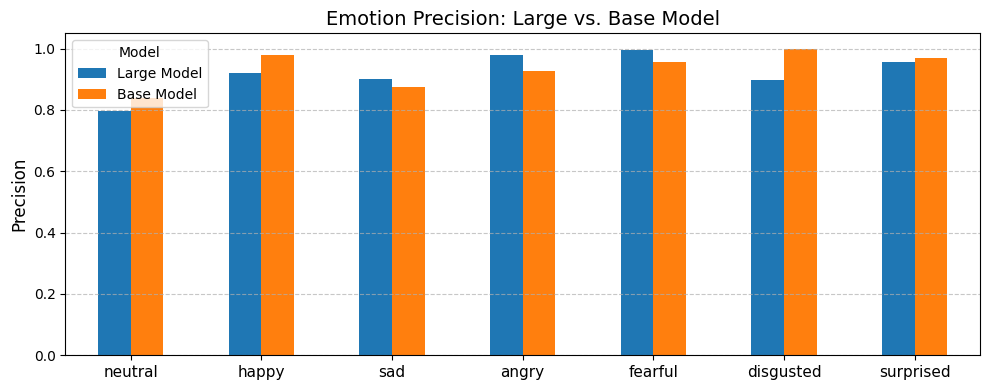

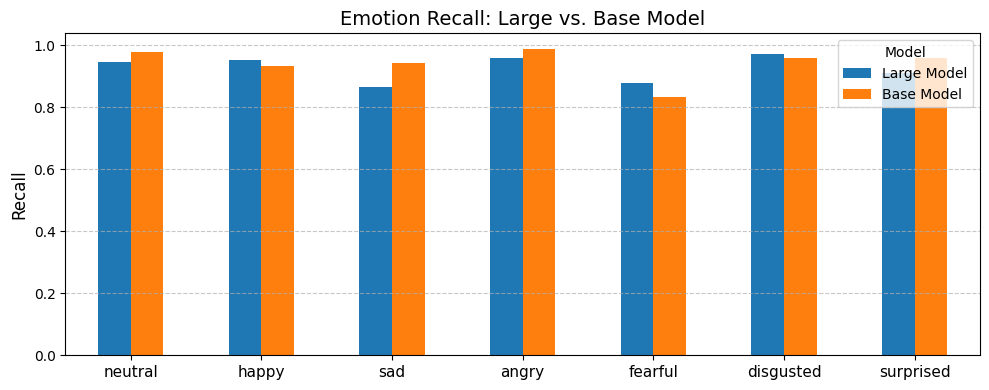

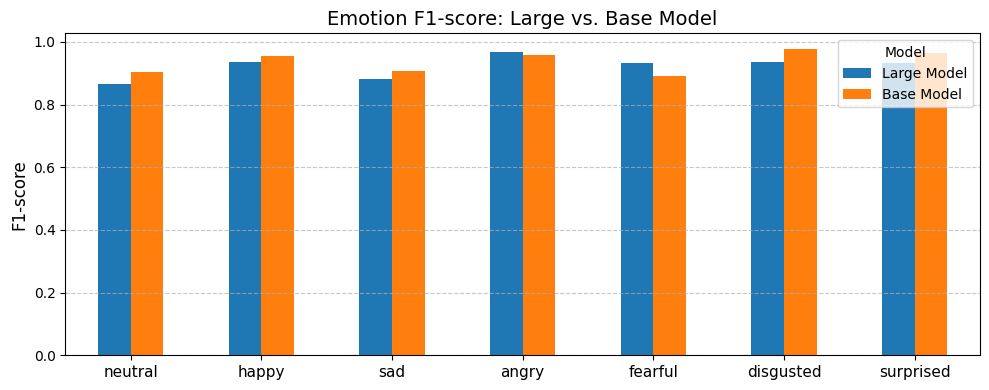

In [ ]:
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from glob import glob
from funasr import AutoModel
from sklearn.metrics import classification_report

def compare_and_plot_all():
    label_map = {"01": "neutral", "03": "happy", "04": "sad", "05": "angry", 
                 "06": "fearful", "07": "disgusted", "08": "surprised"}
    
    files = [f for f in glob("/kaggle/input/datasets/uwrfkaggler/ravdess-emotional-speech-audio/*/*.wav") 
             if os.path.basename(f).split('-')[1] == '01' and os.path.basename(f).split('-')[2] in label_map]

    models = {"Large Model": "iic/emotion2vec_plus_large", "Base Model": "iic/emotion2vec_plus_base"}
    metrics = {'precision': {}, 'recall': {}, 'f1-score': {}}

    # 1. Evaluate both models
    for name, path in models.items():
        print(f"Running {name}...")
        model = AutoModel(model=path, trust_remote_code=True, disable_update=True)
        results = model.generate(input=files, granularity="utterance", extract_embedding=False, batch_size_s=60)
        
        y_true, y_pred = [], []
        for r in results:
            code = os.path.basename(r['key']).split('-')[2]
            if code in label_map:
                y_true.append(label_map[code])
                y_pred.append(r['labels'][np.argmax(r['scores'])].split('/')[-1])
        
        report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
        
        # 2. Store all 3 metrics
        for m in metrics.keys():
            metrics[m][name] = {emo: report[emo][m] for emo in label_map.values()}

    # 3. Plot each metric in its own figure
    for m_name, m_data in metrics.items():
        pd.DataFrame(m_data).plot(kind='bar', figsize=(10, 4))
        plt.title(f'Emotion {m_name.capitalize()}: Large vs. Base Model', fontsize=14)
        plt.ylabel(m_name.capitalize(), fontsize=12)
        plt.xticks(rotation=0, fontsize=11)
        plt.legend(title='Model')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

compare_and_plot_all()

## Single Audio Example

In [35]:
import urllib.request
import numpy as np
from funasr import AutoModel

def predict_jfk_emotion():
    # 1. Download the audio file securely
    url = "https://huggingface.co/datasets/Xenova/transformers.js-docs/resolve/main/jfk.wav"
    audio_file = "jfk.wav"
    
    opener = urllib.request.build_opener()
    opener.addheaders = [('User-agent', 'Mozilla/5.0')]
    urllib.request.install_opener(opener)
    urllib.request.urlretrieve(url, audio_file)

    # 2. Initialize Model & Run Inference
    print("Loading model and running inference...")
    model = AutoModel(model="iic/emotion2vec_plus_large", trust_remote_code=True, device="cuda:0", disable_update=True)
    res = model.generate(input=audio_file, granularity="utterance", extract_embedding=False)

    # 3. Parse the result and split the bilingual tag to get the English word
    predicted_emotion = res[0]['labels'][np.argmax(res[0]['scores'])].split('/')[-1]
    
    print("\n" + "="*40)
    print(f" Predicted Emotion: {predicted_emotion}")
    print("="*40)

if __name__ == "__main__":
    predict_jfk_emotion()

Loading model and running inference...
funasr version: 1.3.1.


Detect model requirements, begin to install it: /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/requirements.txt
install model requirements successfully
Loading remote code failed: model, No module named 'model'
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.0.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.1.0.bias, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modality_encoders.AUDIO.decoder.blocks.2.0.weight, /root/.cache/modelscope/hub/models/iic/emotion2vec_plus_large/model.pt
Warning, miss key in ckpt: modali

rtf_avg: 0.026: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]                                                                                      


 Predicted Emotion: NEUTRAL
